In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, pandas as pd
import seaborn.apionly as sns
%matplotlib inline

In [2]:
sns.set_context('poster')

In [6]:

def make_array(param_string):
    return np.array(param_string.strip('[]').replace('\n','').split()).astype(float)


In [9]:
df = pd.read_csv('results/varations.csv')
df['data_params'] = df['data_params'].apply(make_array)
df['model_params'] = df['model_params'].apply(make_array)
df['loglog'] = np.log10(np.abs(df.log_like.values))
df['loglog'][df['loglog'].values <= 0.] = 0.
df['loglog'] = np.sign(df.log_like.values) * df['loglog'].values
df.head()

/Users/bcook/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,gal_num,N_im,param_num,vary_frac,like_mode,lum_cut,log_like,data_params,data_meta,model_params,model_meta,loglog
0,0.0,256.0,-1.0,0.0,0.0,inf,106290.00000,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],5.026492
1,0.0,256.0,-1.0,0.0,1.0,inf,-1161.60000,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],-3.065057
2,0.0,256.0,-1.0,0.0,2.0,inf,-0.20843,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],-0.000000
3,0.0,256.0,-1.0,0.0,0.0,inf,99533.00000,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],4.997967
4,0.0,256.0,-1.0,0.0,1.0,inf,-1976.20000,"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],"[-0.5, -0.3, 0.75426991, 1.75426991, 2.1349388...",[ 4.],-3.295831


In [10]:
df.data_params[0]

array([-0.5       , -0.3       ,  0.75426991,  1.75426991,  2.13493886,
        2.63493886,  3.13493886,  3.63493886,  3.56710397])

In [11]:
from pcmdpy import galaxy


In [80]:
reload(galaxy)

<module 'pcmdpy.galaxy' from '/Users/bcook/pCMDs/pixcmd/pcmdpy/galaxy.py'>

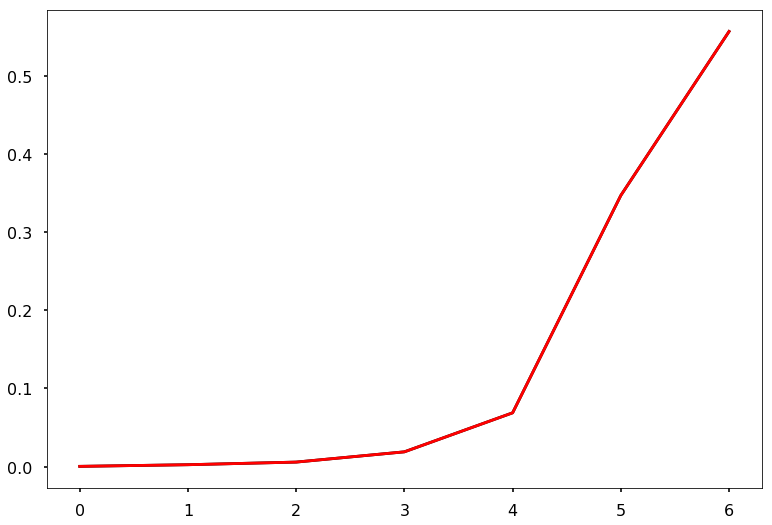

In [81]:
plt.plot(galaxy.Rising_Tau(np.array([-1., -1., 0., 10.])).SFH, 'k-')
plt.plot(galaxy.Tau_Model(np.array([-1., -1., 0., 10.])).SFH, 'r-')

In [59]:
10.**10.2

15848931924.611109

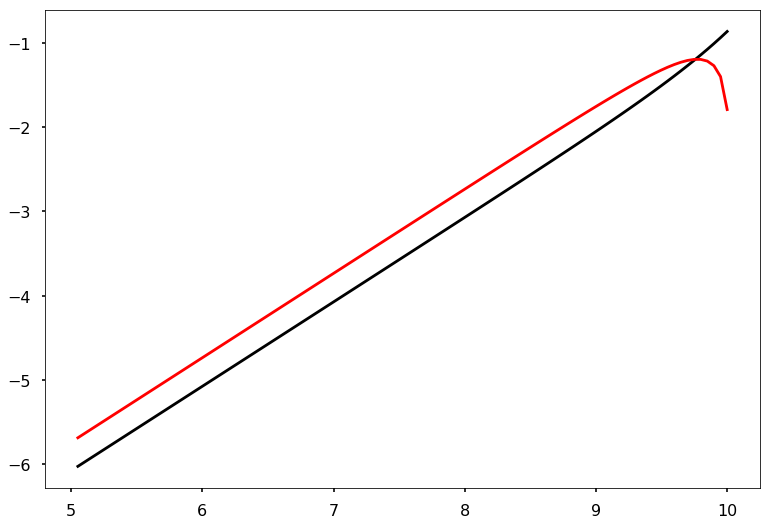

In [71]:
tau = 20.
t = np.logspace(-4, 1, 100)
sfh1 = np.exp(t[1:] / tau) - np.exp(t[:-1]/tau)
sfh1 /= np.sum(sfh1)
sfh2 = (tau + 10 - t) * np.exp(t/tau)
sfh2 = sfh2[1:] - sfh2[:-1]
sfh2 /= np.sum(sfh2)

plt.plot(np.log10(t[1:]*1e9),np.log10(sfh1), 'k-')
plt.plot(np.log10(t[1:]*1e9),np.log10(sfh2), 'r-')
